In [1]:
import numpy as np
from numpy import linalg as LA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("data_clustering.csv",header=0) # import the csv as a dataframe without header
data_clustering=df.values # take the data in the dataframe as a numpy array
X_training=data_clustering[:,:2]

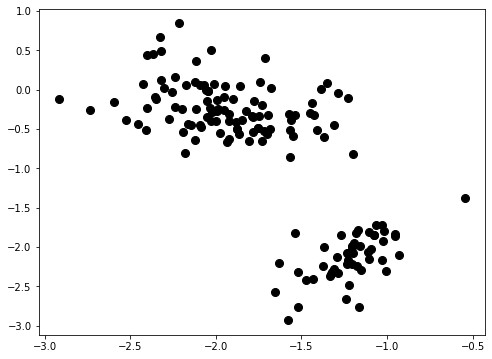

In [2]:
plt.figure(figsize=(8, 6))

ax=plt.subplot(111)

ax.plot(X_training[:,0], X_training[:,1], color='black', marker='o', linestyle='none', linewidth=4, markersize=8)
plt.savefig('lec16_1.eps',bbox_inches='tight')


### Assign random centroids for 3 clusters

In [3]:
class_num=2
Ctrd=np.zeros([class_num,2])
Ctrd[:,0]=np.random.uniform(min(X_training[:,0]),max(X_training[:,0]),class_num)
Ctrd[:,1]=np.random.uniform(min(X_training[:,1]),max(X_training[:,1]),class_num)
print(Ctrd)

[[-2.31362434 -2.5384626 ]
 [-1.95758885 -1.68897029]]


### Plot the initial centroids

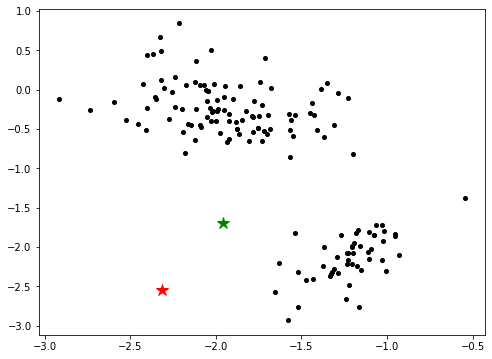

In [4]:

plt.figure(figsize=(8, 6))

ax=plt.subplot(111)

ax.plot(X_training[:,0], X_training[:,1], color='black', marker='o', linestyle='none', linewidth=2, markersize=4)

color_set = ['r', 'g', 'b', 'y', 'c', 'm']
for i in range(class_num):
    ax.plot(Ctrd[i,0], Ctrd[i,1], color=color_set[i], marker='*', linestyle='none', linewidth=2, markersize=12)
plt.savefig('lec16_2.eps',bbox_inches='tight')

### assign the class and update the centroids

In [5]:
# define the distance function
def dist(s,t):
    #return sum((s-t)**2)**1/2
    return np.linalg.norm(s-t, axis=1)

Ctrd_old=np.zeros(Ctrd.shape) # store the old centroids
error=LA.norm(Ctrd-Ctrd_old)
clusters_ind=np.zeros(len(X_training))
clusters_label=np.zeros([len(X_training),class_num])
itr_ct=0

In [6]:
while error!=0:
    # assign the class for each point
    for j in range(len(X_training)):
        distances=dist(X_training[j,:], Ctrd)
        min_id=np.argmin(distances)
        clusters_ind[j]=min_id
        clusters_label[j,:]=np.eye(class_num)[min_id,:]

    Ctrd_old=Ctrd.copy() # store the old centroids
    
    # update the centroids
    for i in range(class_num):
        Ctrd[i,:]=clusters_label[:,i].T@X_training/sum(clusters_label[:,i])

    error=LA.norm(Ctrd_old-Ctrd)
    
    itr_ct=itr_ct+1

In [7]:
itr_ct

4

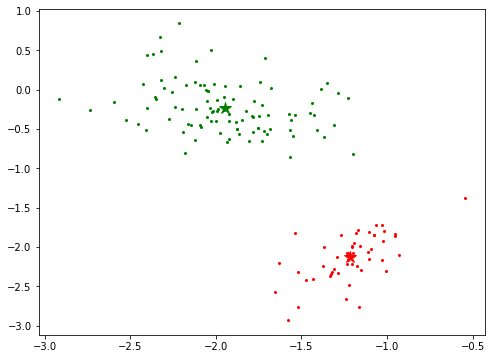

In [8]:
# plot the clusters
C1_id=[i for i in range(len(X_training)) if clusters_ind[i]==0]
C2_id=[i for i in range(len(X_training)) if clusters_ind[i]==1]
C3_id=[i for i in range(len(X_training)) if clusters_ind[i]==2]


plt.figure(figsize=(8, 6))
ax=plt.subplot(111)

ax.plot(X_training[C1_id,0], X_training[C1_id,1], color=color_set[0], marker='.', linestyle='none', linewidth=2, markersize=4)
ax.plot(X_training[C2_id,0], X_training[C2_id,1], color=color_set[1], marker='.', linestyle='none', linewidth=2, markersize=4)
ax.plot(X_training[C3_id,0], X_training[C3_id,1], color=color_set[2], marker='.', linestyle='none', linewidth=2, markersize=4)

for i in range(class_num):
    ax.plot(Ctrd[i,0], Ctrd[i,1], color=color_set[i], marker='*', linestyle='none', linewidth=2, markersize=12)

### how to deal with empty clusters?

If a centroid has no points closeby, move it to the furthest point in the training data.

In [9]:
while error!=0:
    # assign the class for each point
    for j in range(len(X_training)):
        distances=dist(X_training[j,:], Ctrd)
        min_id=np.argmin(distances)
        clusters_ind[j]=min_id
        clusters_label[j,:]=np.eye(class_num)[min_id,:]

    Ctrd_old=Ctrd.copy() # store the old centroids
    
    # update the centroids
    for i in range(class_num):
        if sum(clusters_label[:,i])!=0:
            Ctrd[i,:]=clusters_label[:,i].T@X_training/sum(clusters_label[:,i])
        else:
            distances=dist(Ctrd[i,:],X_training)
            max_id=np.argmax(distances)
            Ctrd[i,:]=X_training[max_id,:]

    error=LA.norm(Ctrd_old-Ctrd)
    
    itr_ct=itr_ct+1

### local minima

Try many initial centroids and choose the one with the smallest objective $\sum_{j=1}^N\sum_{k=1}^K y_{j,k}d(x_j, c_k)$

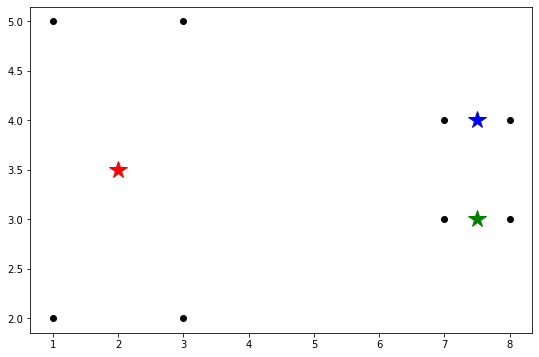

In [10]:
# an example of local minima
X_lm=np.array([1,1,3,3,7,7,8,8])
Y_lm=np.array([2,5,2,5,3,4,3,4])
Cx_lm=np.array([2, 7.5,7.5])
Cy_lm=np.array([3.5,3,4])

plt.figure(figsize=(9, 6))
ax=plt.subplot(111)

ax.plot(X_lm, Y_lm, color='black', marker='.', linestyle='none', linewidth=2, markersize=12)

for i in range(3):
    ax.plot(Cx_lm[i], Cy_lm[i], color=color_set[i], marker='*', linestyle='none', linewidth=2, markersize=18)
    
plt.savefig('lec17_1.eps',bbox_inches='tight')

In [11]:
# It is convenient to have a function to produce the labels and centroids for given training inputs and initial centroids
def Kmeans_clustering(training_data,centroids_initial):

    X_training=training_data
    Ctrd=centroids_initial

    class_num=len(Ctrd)

    Ctrd_old=np.zeros(Ctrd.shape) # store the old centroids
    error=LA.norm(Ctrd-Ctrd_old)
    clusters_ind=np.zeros(len(X_training))
    clusters_label=np.zeros([len(X_training),class_num])
    itr_ct=0

    while error!=0:
        # assign the class for each point
        for j in range(len(X_training)):
            distances=dist(X_training[j,:], Ctrd)
            min_id=np.argmin(distances)
            clusters_ind[j]=min_id
            clusters_label[j,:]=np.eye(class_num)[min_id,:]

        Ctrd_old=Ctrd.copy() # store the old centroids

        # update the centroids
        for i in range(class_num):
            if sum(clusters_label[:,i])!=0:
                Ctrd[i,:]=clusters_label[:,i].T@X_training/sum(clusters_label[:,i])
            else:
                distances=dist(Ctrd[i,:],X_training)
                max_id=np.argmax(distances)
                Ctrd[i,:]=X_training[max_id,:]

        error=LA.norm(Ctrd_old-Ctrd)

        itr_ct=itr_ct+1
    
    # compute the objective function: in-group variance
    temp=0
    for j in range(len(X_training)):
        temp=temp+sum(clusters_label[j,:]*dist(X_training[j,:], Ctrd))
    
    group_variance=temp

    return clusters_label, Ctrd, group_variance

In [12]:
# Try many random centroids and select the best one
num_cent=100
group_variance_opt=1.E10 # set a big number as initial objective

for j in range(num_cent):
    # generate the random centroids
    class_num=3
    Ctrd=np.zeros([class_num,2])
    Ctrd[:,0]=np.random.uniform(min(X_training[:,0]),max(X_training[:,0]),class_num)
    Ctrd[:,1]=np.random.uniform(min(X_training[:,1]),max(X_training[:,1]),class_num)
    
    # compute the final labels, centroids, and in-group variance
    clusters_label, Ctrd, group_variance = Kmeans_clustering(X_training,Ctrd)
    
    if group_variance<group_variance_opt:
        clusters_label_opt=clusters_label.copy()
        Ctrd_opt=Ctrd.copy()
        group_variance_opt=group_variance

### Soft K-means

Instead of taking the label $y_{j}$ as $(0,\ldots,1, \ldots,0)$, consider $y_{j,k}=\frac{exp(-\beta d(x_j, c_k))}{\sum_{l=1}^K exp(-\beta d(x_j, c_l))}$  

In [13]:
beta=2

while error!=0:
    # compute the class label for each point
    for j in range(len(X_training)):
        distances=np.exp(-beta*dist(X_training[j,:], Ctrd))
        clusters_label[j,:]=distances/np.sum(distances)

    Ctrd_old=Ctrd.copy() # store the old centroids
    
    # update the centroids
    for i in range(class_num):
        Ctrd[i,:]=clusters_label[:,i].T@X_training/sum(clusters_label[:,i])

    error=LA.norm(Ctrd_old-Ctrd)
    
    itr_ct = itr_ct+1

In [15]:
print(itr_ct)

4


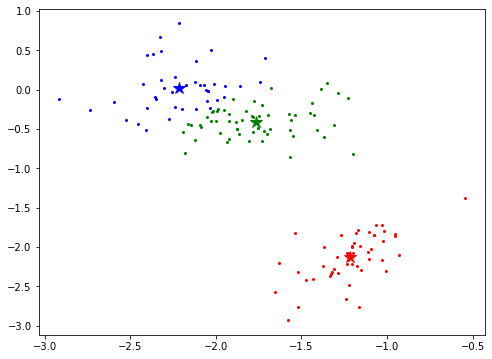

In [14]:
# plot the clusters
C1_id=[i for i in range(len(X_training)) if np.argmax(clusters_label[i,:])==0]
C2_id=[i for i in range(len(X_training)) if np.argmax(clusters_label[i,:])==1]
C3_id=[i for i in range(len(X_training)) if np.argmax(clusters_label[i,:])==2]


plt.figure(figsize=(8, 6))
ax=plt.subplot(111)

ax.plot(X_training[C1_id,0], X_training[C1_id,1], color=color_set[0], marker='.', linestyle='none', linewidth=2, markersize=4)
ax.plot(X_training[C2_id,0], X_training[C2_id,1], color=color_set[1], marker='.', linestyle='none', linewidth=2, markersize=4)
ax.plot(X_training[C3_id,0], X_training[C3_id,1], color=color_set[2], marker='.', linestyle='none', linewidth=2, markersize=4)

for i in range(class_num):
    ax.plot(Ctrd[i,0], Ctrd[i,1], color=color_set[i], marker='*', linestyle='none', linewidth=2, markersize=12)